In [1]:
from __future__ import absolute_import, division, print_function
from __future__ import unicode_literals
import heartpy as hp
import pandas as pd
import numpy as np
import pyedflib
import numpy as np
import os
import mne
import scipy
from os.path import join
import xml.etree.ElementTree as ET
import numpy as np
from biosppy.signals import ecg
import matplotlib.pyplot as plt
import fnmatch
import neurokit as nk
import sklearn.externals.joblib
import pysiology


Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


In [3]:
#import pingouin as pg

In [19]:
#Reading csv files and convertng into txt format. Extracting particular channel data.

files = os.listdir('./csv_data_ecg/')

sf = 128
emotion_of_file = []
count = 0
for name in files:
#     x = np.load('content/csv_data/' + name,allow_pickle=True)
    df = pd.read_csv('./csv_data_ecg/' + name)
    print(name)
    df_channel_ecg3 = df['EXG3']
    df_channel_ecg2 = df['EXG2']
    df_channel_ecg1 = df['# EXG1']
    jj = name.split('.')[0]
#     df_channel_ecg.shape
#     x = np.load('content/preProcessedData/Part_10_S_Trial10_emotion_filtered.npy',allow_pickle=True)
    df_channel_ecg1.to_csv("./txt_ecg_1/"+ jj +"_exg1.txt", header=None, index=None, sep=' ', mode='a')
    df_channel_ecg2.to_csv("./txt_ecg_2/"+ jj +"_exg2.txt", header=None, index=None, sep=' ', mode='a')
    df_channel_ecg2.to_csv("./txt_ecg_3/"+ jj +"_exg3.txt", header=None, index=None, sep='\t', mode='a')

  


Part_29_S_Trial19_emotion_0_filtered.csv


/Users/nikhilsinghkushwah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()
/Users/nikhilsinghkushwah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/Users/nikhilsinghkushwah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


Part_30_S_Trial2_emotion_0_filtered.csv
Part_18_S_Trial13_emotion_4_filtered.csv
Part_11_S_Trial20_emotion_0_filtered.csv
Part_4_S_Trial5_emotion_12_filtered.csv
Part_24_S_Trial9_emotion_0_filtered.csv
Part_17_S_Trial15_emotion_5_filtered.csv
Part_3_S_Trial7_emotion_2_filtered.csv
Part_2_S_Trial5_emotion_11_filtered.csv
Part_7_S_Trial16_emotion_0_filtered.csv
Part_8_S_Trial1_emotion_3_filtered.csv
Part_17_S_Trial9_emotion_0_filtered.csv
Part_18_S_Trial5_emotion_5_filtered.csv
Part_10_S_Trial1_emotion_2_filtered.csv
Part_24_S_Trial16_emotion_4_filtered.csv
Part_3_S_Trial15_emotion_6_filtered.csv
Part_13_S_Trial3_emotion_4_filtered.csv
Part_17_S_Trial20_emotion_4_filtered.csv
Part_30_S_Trial8_emotion_0_filtered.csv
Part_6_S_Trial13_emotion_5_filtered.csv
Part_20_S_Trial6_emotion_11_filtered.csv
Part_8_S_Trial5_emotion_2_filtered.csv
Part_3_S_Trial11_emotion_0_filtered.csv
Part_11_S_Trial2_emotion_0_filtered.csv
Part_17_S_Trial11_emotion_4_filtered.csv
Part_21_S_Trial10_emotion_0_filtered

In [4]:
#refer https://github.com/chandanacharya1/ECG-Feature-extraction-using-Python

def calc_rmssd(list):
    diff_nni = np.diff(list)#successive differences
    return np.sqrt(np.mean(diff_nni ** 2))
    
    
 #independent function to calculate AVRR   
def calc_avrr(list):
    return sum(list)/len(list)

 #independent function to calculate SDRR   
def calc_sdrr(list):
    return statistics.stdev(list)

 #independent function to calculate SKEW   
def calc_skew(list):
    return skew(list)

 #independent function to calculate KURT   
def calc_kurt(list):
    return kurtosis(list)

def calc_NNx(list):
    diff_nni = np.diff(list)
    return sum(np.abs(diff_nni) > 50)
    
def calc_pNNx(list):
    length_int = len(list)
    diff_nni = np.diff(list)
    nni_50 = sum(np.abs(diff_nni) > 50)
    return 100 * nni_50 / length_int

"""NON LINEAR DOMAIN"""
 #independent function to calculate SD1
def calc_SD1(list):
    diff_nn_intervals = np.diff(list)
    return np.sqrt(np.std(diff_nn_intervals, ddof=1) ** 2 * 0.5)
 #independent function to calculate SD2
def calc_SD2(list):
    diff_nn_intervals = np.diff(list)
    return np.sqrt(2 * np.std(list, ddof=1) ** 2 - 0.5 * np.std(\
                   diff_nn_intervals, ddof=1) ** 2)
    
 #independent function to calculate SD1/SD2
def calc_SD1overSD2(list):
      diff_nn_intervals = np.diff(list)
      sd1 = np.sqrt(np.std(diff_nn_intervals, ddof=1) ** 2 * 0.5)
      sd2 = np.sqrt(2 * np.std(list, ddof=1) ** 2 - 0.5 * np.std(\
                    diff_nn_intervals, ddof=1) ** 2)
      ratio_sd2_sd1 = sd2 / sd1
      return ratio_sd2_sd1
    
    
 #independent function to calculate CSI
def calc_CSI(list):
    diff_nn_intervals = np.diff(list)
    sd1 = np.sqrt(np.std(diff_nn_intervals, ddof=1) ** 2 * 0.5)
    sd2 = np.sqrt(2 * np.std(list, ddof=1) ** 2 - 0.5 * np.std(\
                  diff_nn_intervals, ddof=1) ** 2)
    L=4 * sd1
    T=4 * sd2
    return L/T
       
 #independent function to calculate CVI
def calc_CVI(list):
    diff_nn_intervals = np.diff(list)
    sd1 = np.sqrt(np.std(diff_nn_intervals, ddof=1) ** 2 * 0.5)
    sd2 = np.sqrt(2 * np.std(list, ddof=1) ** 2 - 0.5 * np.std(\
                  diff_nn_intervals, ddof=1) ** 2)
    L=4 * sd1
    T=4 * sd2
    return np.log10(L * T)
 
 #independent function to calculate modified CVI
def calc_modifiedCVI(list):
    diff_nn_intervals = np.diff(list)
    sd1 = np.sqrt(np.std(diff_nn_intervals, ddof=1) ** 2 * 0.5)
    sd2 = np.sqrt(2 * np.std(list, ddof=1) ** 2 - 0.5 * np.std(\
                  diff_nn_intervals, ddof=1) ** 2)
    L=4 * sd1
    T=4 * sd2
    return L ** 2 / T


# RR_list = []
# cnt = 0
# fs = 256
# peaklist = out[2]
# while (cnt < (len(peaklist)-1)):
#     RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
#     ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
#     RR_list.append(ms_dist) #Append to list
#     cnt += 1

# bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
# print("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

In [6]:
# RR_list = []
# cnt = 0
# fs = 256
# peaklist = out[2]
# while (cnt < (len(peaklist)-1)):
#     RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
#     ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
#     RR_list.append(ms_dist) #Append to list
#     cnt += 1

# bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
# print("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print


count = 0
rmssd_list = []
avrr_list = []
sdrr_list = []
skew_list = []
kurt_list = []
NNx_list = []
pNNx_list = []
SD1_list = []
SD2_list = []
SD1overSD2_list = []
CSI_list = []
CVI_list = []
modifiedCVI_list = []
bpm_list = []
emotion_of_file_ecg =[]

import statistics
from scipy.stats import kurtosis
from scipy.stats import skew
files = os.listdir('txt_ecg_2')

for name in files:
    print(name)
    signal = np.genfromtxt('txt_ecg_2/'+name,delimiter = ',',encoding='latin1')
    smoothin_signal = hp.filtering.smooth_signal(signal, sample_rate = 256, window_length=None, polyorder=3)
    less_motion_artifact = signal - smoothin_signal
    print(less_motion_artifact)
    fil = hp.filtering.filter_signal(less_motion_artifact, cutoff= 0.05, sample_rate = 256, order=2, filtertype='highpass', return_top=False)
    out = ecg.ecg(signal=fil, sampling_rate=256, show=False)
    RR_list = []
    cnt = 0
    fs = 256
    peaklist = out[2]
    while (cnt < (len(peaklist)-1)):
        RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
        ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
        RR_list.append(ms_dist) #Append to list
        cnt += 1

    bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
    print("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print


    rmssd_list.append(calc_rmssd(RR_list))
    avrr_list.append(calc_avrr(RR_list))
    sdrr_list.append(calc_sdrr(RR_list))
    skew_list.append(calc_skew(RR_list))
    kurt_list.append(calc_kurt(RR_list))
    NNx_list.append(calc_NNx(RR_list))
    pNNx_list.append(calc_pNNx(RR_list))
    SD1_list.append(calc_SD1(RR_list))
    SD2_list.append(calc_SD2(RR_list))
    SD1overSD2_list.append(calc_SD1overSD2(RR_list))
    CSI_list.append(calc_CSI(RR_list))
    CVI_list.append(calc_CVI(RR_list))
    modifiedCVI_list.append(calc_modifiedCVI(RR_list))
    bpm_list.append(bpm)
    name_of_file = name.split('_')
# #     #print(name_of_file)
    emotion_of_file_ecg.append(name_of_file[-3])
    count += 1
print(count)
    

Part_10_S_Trial10_emotion_0_filtered_exg2.txt
[-3.39084844e-06  3.25059228e-06 -3.08568363e-06 ... -3.13683108e-04
  1.29782324e-04  7.74344274e-04]
Average Heart Beat is: 86.1
Part_10_S_Trial11_emotion_5_filtered_exg2.txt
[ 1.36377205e-05  1.85339401e-06 -5.42125461e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 86.4
Part_10_S_Trial12_emotion_4_filtered_exg2.txt
[-1.18490593e-05  7.46109732e-07  1.00412605e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 86.8
Part_10_S_Trial13_emotion_11_filtered_exg2.txt
[-5.89197629e-06 -3.81919700e-06  1.07714394e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 87.7
Part_10_S_Trial14_emotion_11_filtered_exg2.txt
[ 9.85079376e-06  3.79030817e-06 -1.66871881e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 89.1
Part_10_S_Trial15_emotion_0_filtered_exg2.txt
[-2.75770858e-06  4.19786083e-06  1.54434010e-06 ... -1.32348898e-2

Average Heart Beat is: 54.0
Part_13_S_Trial17_emotion_11_filtered_exg2.txt
[ 1.06921811e-06  3.12367478e-06  4.06685657e-07 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 52.9
Part_13_S_Trial18_emotion_3_filtered_exg2.txt
[-4.65518371e-06  6.58875919e-06  6.76940616e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 50.8
Part_13_S_Trial19_emotion_0_filtered_exg2.txt
[-1.09404285e-05  2.59242577e-06  1.06060028e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 52.8
Part_13_S_Trial1_emotion_6_filtered_exg2.txt
[-7.06165362e-06  2.56864376e-06  1.07801427e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 54.7
Part_13_S_Trial20_emotion_0_filtered_exg2.txt
[ 2.61122381e-06 -6.39519652e-06  2.01064776e-06 ...  4.42395723e-04
 -1.82233018e-04 -1.09022830e-03]
Average Heart Beat is: 52.9
Part_13_S_Trial2_emotion_11_filtered_exg2.txt
[-3.85917022e-06  4.25625282e-06  1.46170

Average Heart Beat is: 76.8
Part_16_S_Trial8_emotion_0_filtered_exg2.txt
[-5.21413673e-05 -2.77094146e-05 -9.63728245e-07 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 79.1
Part_16_S_Trial9_emotion_0_filtered_exg2.txt
[-9.64814457e-06  2.43122628e-05  1.21446292e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 77.7
Part_17_S_Trial10_emotion_2_filtered_exg2.txt
[ 3.71532433e-06  2.61156035e-06 -2.91384402e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 67.2
Part_17_S_Trial11_emotion_4_filtered_exg2.txt
[-5.54493634e-06  8.20837159e-07  1.46630698e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 67.8
Part_17_S_Trial12_emotion_11_filtered_exg2.txt
[ 6.86708133e-07 -7.93448320e-06 -4.67649382e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 66.6
Part_17_S_Trial13_emotion_0_filtered_exg2.txt
[-9.32141440e-06 -2.24155569e-07  1.095914

[-6.00489275e-06 -3.76966718e-06  3.21141663e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 80.8
Part_19_S_Trial15_emotion_4_filtered_exg2.txt
[ 1.28736942e-05 -1.07263424e-05 -1.86570865e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 78.5
Part_19_S_Trial16_emotion_4_filtered_exg2.txt
[-8.53224919e-05 -9.33272848e-06  3.67432977e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 78.5
Part_19_S_Trial17_emotion_0_filtered_exg2.txt
[-4.76507667e-06  1.00375936e-05  2.71945986e-06 ... -5.37326017e-04
  2.20946317e-04  1.32334511e-03]
Average Heart Beat is: 76.5
Part_19_S_Trial18_emotion_12_filtered_exg2.txt
[-8.38912980e-06 -2.00336168e-07 -1.46354105e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 73.7
Part_19_S_Trial19_emotion_12_filtered_exg2.txt
[-5.19923185e-06 -1.64093180e-06  7.11808212e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average He

[ 1.01417761e-05 -6.25215725e-06 -2.29429388e-07 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 60.1
Part_20_S_Trial2_emotion_5_filtered_exg2.txt
[ 1.40524847e-05 -1.78001808e-06 -1.38146182e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 67.0
Part_20_S_Trial3_emotion_11_filtered_exg2.txt
[ 3.34239553e-05 -2.28059942e-06 -1.99032780e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 69.8
Part_20_S_Trial4_emotion_2_filtered_exg2.txt
[-4.44841058e-06  9.11755794e-07  3.70420813e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 66.7
Part_20_S_Trial5_emotion_0_filtered_exg2.txt
[-5.29176373e-06 -5.15597338e-06  3.94084301e-06 ...  1.95212669e-04
 -1.17796006e-04 -5.87293936e-04]
Average Heart Beat is: 67.7
Part_20_S_Trial6_emotion_11_filtered_exg2.txt
[ 8.74861631e-06  7.18844291e-06 -1.50130552e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart B

[-6.32411225e-06  1.15154648e-05  5.32669073e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 71.8
Part_22_S_Trial9_emotion_0_filtered_exg2.txt
[-1.20954905e-06  2.51960005e-07  1.13702665e-06 ... -2.41124674e-04
  9.87992939e-05  5.93003990e-04]
Average Heart Beat is: 71.0
Part_23_S_Trial10_emotion_3_filtered_exg2.txt
[-1.24104578e-05 -1.89960653e-06  5.95244139e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 86.0
Part_23_S_Trial11_emotion_0_filtered_exg2.txt
[-2.09397263e-05  2.82190184e-06  2.05746561e-05 ... -8.55058054e-04
 -2.80258724e-05  1.26857245e-03]
Average Heart Beat is: 80.4
Part_23_S_Trial12_emotion_11_filtered_exg2.txt
[-3.73546318e-06 -3.01342926e-06  4.98031990e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 86.6
Part_23_S_Trial13_emotion_6_filtered_exg2.txt
[-9.64769585e-06 -4.33528579e-06  5.60500033e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Hear

[ 3.73904865e-05 -1.02573154e-05 -3.19774676e-05 ... -4.30473094e-04
  1.76266870e-04  1.05853663e-03]
Average Heart Beat is: 86.6
Part_25_S_Trial16_emotion_11_filtered_exg2.txt
[-6.69678250e-07  3.98768494e-06  7.77428956e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 82.7
Part_25_S_Trial17_emotion_3_filtered_exg2.txt
[ 2.13445118e-05 -2.93955119e-06 -1.43243790e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 80.8
Part_25_S_Trial18_emotion_4_filtered_exg2.txt
[ 1.74271473e-05 -2.57241512e-06 -1.75761395e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 82.7
Part_25_S_Trial19_emotion_5_filtered_exg2.txt
[ 6.09158062e-06  7.09173903e-06 -3.49780383e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 79.5
Part_25_S_Trial1_emotion_12_filtered_exg2.txt
[ 4.65806832e-06 -6.72997154e-06 -1.32448424e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Hea

[ 6.26014869e-06  6.87872661e-08 -5.08681218e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 68.1
Part_28_S_Trial3_emotion_4_filtered_exg2.txt
[ 1.30570806e-05 -1.44989583e-05 -9.22410735e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 71.2
Part_28_S_Trial4_emotion_5_filtered_exg2.txt
[ 4.02100753e-06 -3.21418210e-06 -3.37932602e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 68.1
Part_28_S_Trial5_emotion_2_filtered_exg2.txt
[ 8.60686444e-06  4.72794532e-06 -8.13273674e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 67.2
Part_28_S_Trial6_emotion_0_filtered_exg2.txt
[ 1.05523470e-04  3.51827074e-05 -1.07981789e-05 ... -2.26580572e-03
 -4.69640964e-03 -6.35025013e-03]
Average Heart Beat is: 69.7
Part_28_S_Trial7_emotion_1_filtered_exg2.txt
[ 6.99421785e-06 -1.13601286e-05 -1.04370046e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Bea

[-1.00676417e-05  3.51550632e-06 -2.73995871e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 74.0
Part_30_S_Trial10_emotion_2_filtered_exg2.txt
[-2.46137366e-06  2.71025140e-06 -4.78712187e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 98.4
Part_30_S_Trial11_emotion_1_filtered_exg2.txt
[-5.90287371e-07  5.91868564e-07  2.73858979e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 95.0
Part_30_S_Trial12_emotion_5_filtered_exg2.txt
[ 7.03631179e-07 -1.16722541e-06 -4.92721358e-07 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 90.8
Part_30_S_Trial13_emotion_0_filtered_exg2.txt
[ 8.35910849e-06  1.12574739e-05  8.05505293e-08 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 90.4
Part_30_S_Trial14_emotion_0_filtered_exg2.txt
[-2.79103117e-06 -2.24696166e-06  3.89616732e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Hear

[-1.58839450e-06 -5.16547122e-06  7.13646257e-07 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 63.5
Part_4_S_Trial20_emotion_5_filtered_exg2.txt
[ 4.71842077e-06  5.68983991e-06 -2.06930475e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 63.7
Part_4_S_Trial2_emotion_4_filtered_exg2.txt
[ 1.30643989e-06 -3.70973674e-06  1.82784710e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 69.4
Part_4_S_Trial3_emotion_1_filtered_exg2.txt
[ 1.22721568e-04  3.56491061e-05 -6.60599834e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 66.0
Part_4_S_Trial4_emotion_2_filtered_exg2.txt
[-1.78163773e-05  1.47837868e-06  1.83736025e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 66.2
Part_4_S_Trial5_emotion_12_filtered_exg2.txt
[-3.44483124e-05 -1.40749526e-05  1.95468609e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat i

[-4.76600615e-06 -5.03790736e-06  7.79383802e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 67.7
Part_6_S_Trial8_emotion_2_filtered_exg2.txt
[ 2.18205152e-05  7.77046107e-06 -9.10241397e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 69.1
Part_6_S_Trial9_emotion_0_filtered_exg2.txt
[ 2.52771114e-05 -2.98860612e-05 -3.30526315e-05 ...  2.27189192e-04
  1.74567900e-03  3.20096824e-03]
Average Heart Beat is: 68.5
Part_7_S_Trial10_emotion_3_filtered_exg2.txt
[-1.38076668e-07  2.76953014e-06 -2.81590059e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 65.1
Part_7_S_Trial11_emotion_0_filtered_exg2.txt
[ 9.59720449e-06 -5.81395827e-06 -2.94996900e-06 ... -8.05824281e-04
  3.31960102e-04  1.98600651e-03]
Average Heart Beat is: 62.9
Part_7_S_Trial12_emotion_2_filtered_exg2.txt
[-1.14674468e-05  1.38568120e-07  6.19319392e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat 

[ 1.53491597e-05 -3.56002013e-06 -1.54688540e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 77.6
Part_9_S_Trial1_emotion_2_filtered_exg2.txt
[-6.61744490e-24 -3.30872245e-24 -3.30872245e-24 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 77.4
Part_9_S_Trial2_emotion_2_filtered_exg2.txt
[-1.36056907e-05 -1.49564093e-05 -1.24047871e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 80.5
Part_9_S_Trial3_emotion_0_filtered_exg2.txt
[-8.70408648e-06  7.24011483e-06  1.00946873e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 76.6
Part_9_S_Trial4_emotion_4_filtered_exg2.txt
[-4.52969248e-07 -6.25509528e-06 -4.67838415e-06 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is: 77.6
Part_9_S_Trial5_emotion_6_filtered_exg2.txt
[ 1.16434080e-05 -4.48922782e-06 -1.84099832e-05 ... -1.32348898e-23
 -1.65436123e-23 -1.98523347e-23]
Average Heart Beat is:

In [7]:
import pandas as pd

rmssd =pd.DataFrame(rmssd_list)
avrr = pd.DataFrame(avrr_list)
sdrr =pd.DataFrame(sdrr_list)
skew =pd.DataFrame(skew_list)
kurt=pd.DataFrame(kurt_list)
NNx=pd.DataFrame(NNx_list)
pNNx=pd.DataFrame(pNNx_list)
SD1=pd.DataFrame(SD1_list)
SD2=pd.DataFrame(SD2_list)
SD1overSD2=pd.DataFrame(SD1overSD2_list)
CSI=pd.DataFrame(CSI_list)
CVI=pd.DataFrame(CVI_list)
modifiedCVI=pd.DataFrame(modifiedCVI_list)
bpm=pd.DataFrame(bpm_list)
emotion_of_file=pd.DataFrame(emotion_of_file_ecg)


df = pd.concat([rmssd,avrr,sdrr,skew,kurt,NNx,pNNx,SD1,SD2,SD1overSD2,CSI,CVI,modifiedCVI,bpm,emotion_of_file],axis = 1)
df.columns=['rmssd','avrr','sdrr','skew','kurt','NNx','pNNx','SD1','SD2','SD1overSD2','CSI','CVI','modifiedCVI','bpm','emotion_of_file']
df.head()

,rmssd,avrr,sdrr,skew,kurt,NNx,pNNx,SD1,SD2,SD1overSD2,CSI,CVI,modifiedCVI,bpm,emotion_of_file
0,32.711750,697.018046,46.463525,-0.394986,0.876829,30,14.084507,23.185414,61.482964,2.651795,0.377103,4.358090,34.973163,86.080985,0
1,30.914932,694.648592,33.231099,-0.487308,0.269156,26,10.276680,21.903386,41.579484,1.898313,0.526783,4.163510,46.153368,86.374608,5
2,48.077376,691.562500,53.630114,-3.443766,27.523419,23,10.222222,34.071654,67.760612,1.988768,0.502824,4.567491,68.528166,86.760054,4
3,31.922486,684.227659,41.221806,-0.188584,-0.175489,28,12.280702,22.622372,53.728045,2.374996,0.421053,4.288859,38.100901,87.690112,11
4,32.211763,673.214286,41.527627,0.095429,1.050729,18,10.285714,22.842336,54.104670,2.368614,0.422188,4.296095,38.575030,89.124668,11


## Min Max Scaler

In [8]:
#removing emotion column to do scaling. minmax scaler is used.
df_main = df[(df.emotion_of_file != '1') & (df.emotion_of_file != '12' ) & (df.emotion_of_file != '6')]
df_emotion = df_main['emotion_of_file']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_main.drop('emotion_of_file', axis = 1, inplace = True)
df_main[df_main.columns] = scaler.fit_transform(df_main[df_main.columns])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impo

In [ ]:

#split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)


In [9]:
df_main =pd.concat([df_main, df_emotion], axis=1)
#df_main['emotion_of_file'] = df_main['emotion_of_file'].astype('category')
df_main.head()
df_main.shape
print(df_main.dtypes)

rmssd              float64
avrr               float64
sdrr               float64
skew               float64
kurt               float64
NNx                float64
pNNx               float64
SD1                float64
SD2                float64
SD1overSD2         float64
CSI                float64
CVI                float64
modifiedCVI        float64
bpm                float64
emotion_of_file     object
dtype: object


In [283]:
df_main['emotion_of_file'] = df_main['emotion_of_file'].convert_objects(convert_numeric=True)

/Users/nikhilsinghkushwah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [10]:
# Correlation Matrix
df_main.rcorr(stars=False)

AttributeError: 'DataFrame' object has no attribute 'rcorr'

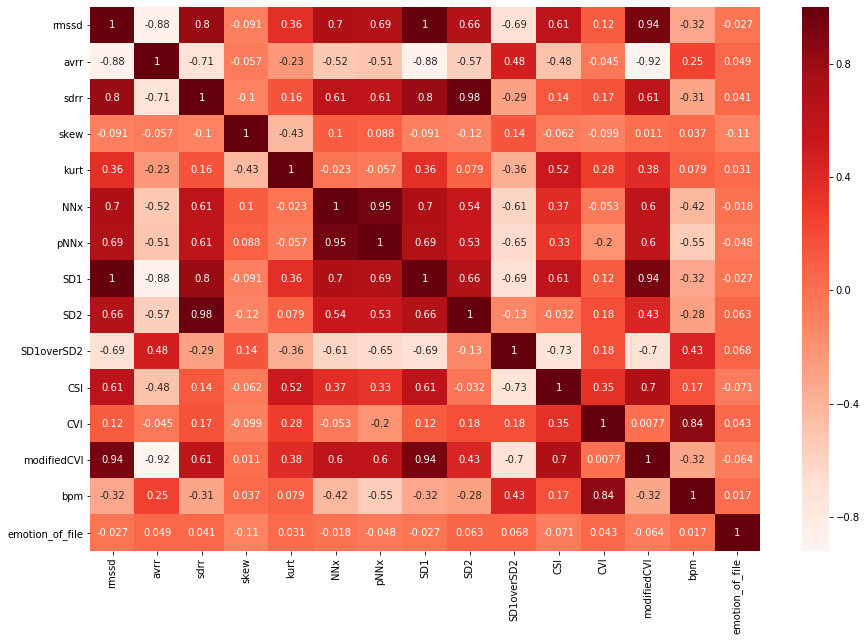

In [284]:
import seaborn as sns
plt.figure(figsize=(15,10))
cor = df_main.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
 
X_1 = df_main[['rmssd','skew','NNx','pNNx','SD1','SD2','SD1overSD2','CSI','modifiedCVI']]
y = df_main['emotion_of_file']

## SVC

In [12]:

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(2) 
projected = pca.fit_transform(X_1)
X_1_train, X_1_test, Y_1_train,Y_1_test = train_test_split(projected, y, test_size = 0.30, random_state = 0)

In [13]:
classifier_1 = SVC(kernel = 'rbf', random_state = 20)
classifier_1.fit(X_1_train, Y_1_train)
Y_1_pred = classifier_1.predict(X_1_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
print(classification_report(Y_1_test, Y_1_pred))

              precision    recall  f1-score   support

           0       0.24      1.00      0.39        33
          11       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        22

   micro avg       0.24      0.24      0.24       136
   macro avg       0.04      0.17      0.07       136
weighted avg       0.06      0.24      0.09       136



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=21,stratify=y)
X_train, X_test, y_train,y_test = train_test_split(X_1, y, test_size = 0.25,random_state=21)

param_rf = {'n_estimators': [10,20,30,40,50],
            'max_features': ['sqrt'],
            'max_depth': [80,120,160,200],
            'min_samples_split': [3,5,7],
            'min_samples_leaf': [1,2],
            'bootstrap': [False]}

rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf, param_rf, cv=5,n_iter=50)
rf_cv.fit(X_train,y_train)
rf_cv.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.18421052631578946

In [16]:
rf_cv.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 160,
 'bootstrap': False}

In [17]:
y_pred_test_rf = rf_cv.predict(X_test)
y_pred_train_rf = rf_cv.predict(X_train)
y_pred_prob_rf = rf_cv.predict_proba(X_test)[:,1]

In [18]:
# import scikitplot
from sklearn.metrics import classification_report, confusion_matrix

cr_rf = classification_report(y_pred_test_rf, y_test)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.27      0.17      0.21        47
          11       0.17      0.15      0.16        27
           2       0.06      0.08      0.06        13
           3       0.14      0.40      0.21         5
           4       0.16      0.14      0.15        36
           5       0.05      0.12      0.07         8

   micro avg       0.15      0.15      0.15       136
   macro avg       0.14      0.18      0.14       136
weighted avg       0.18      0.15      0.16       136



## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("Accuracy score")
print(accuracy_score(y_test, y_predict)*100)

[[ 9  9  3  2  3  4]
 [10  6  1  1  4  2]
 [13  3  0  1  1  0]
 [ 5  5  3  0  1  0]
 [16  8  2  1  2  2]
 [ 8  5  1  0  2  3]]
Accuracy score
14.705882352941178
